JUPYTER NOTEBOOK : 3 VISUALISATIONS

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = ["comito_data.csv", "justine_data.csv", "ella_data.csv", "leonard_data.csv", "clem_data.csv"]
dataframes = [pd.read_csv(file, names=["Pseudo", "Sexe", "Age", "Main Dominante", "Score", "Durée"]) for file in files]
data = pd.concat(dataframes, ignore_index=True) # fusion des données

# conversion colonnes
data["Age"] = pd.to_numeric(data["Age"], errors="coerce")
data["Durée"] = pd.to_numeric(data["Durée"], errors="coerce")
data["Score"] = pd.to_numeric(data["Score"], errors="coerce")
data["Partie"] = data.groupby("Pseudo").cumcount() + 1

1) Score moyen en fonction de la main dominante

Comparons si les droitiers et gauchers performent de la même façon ou différemment.

/var/folders/vv/21d5074d3_l5r6bdkjl17bch0000gn/T/ipykernel_6848/1679239371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Main Dominante", y="Score", data=dominant_mean_scores, palette="muted")


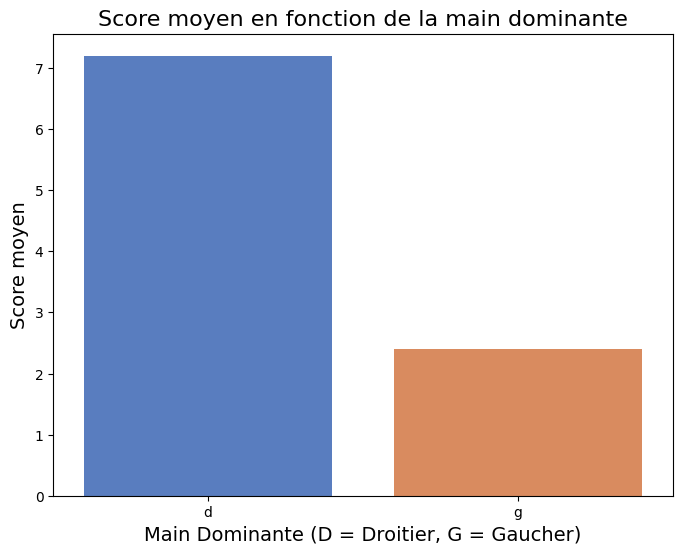

In [32]:
dominant_mean_scores = data.groupby("Main Dominante")["Score"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x="Main Dominante", y="Score", data=dominant_mean_scores, palette="muted")
plt.title("Score moyen en fonction de la main dominante", fontsize=16)
plt.xlabel("Main Dominante (D = Droitier, G = Gaucher)", fontsize=14)
plt.ylabel("Score moyen", fontsize=14)
plt.show()

Les droitiers semblent beaucoup plus à l'aise avec le jeu que les gauchers.


2) Taux d'amélioration du score au fil des parties pour chaque joueur

Cette visualisation montre comment chaque joueur améliore (ou non) son score au cours des cinq parties jouées. Elle met en lumière les courbes d'apprentissage ou les éventuelles stagnations.

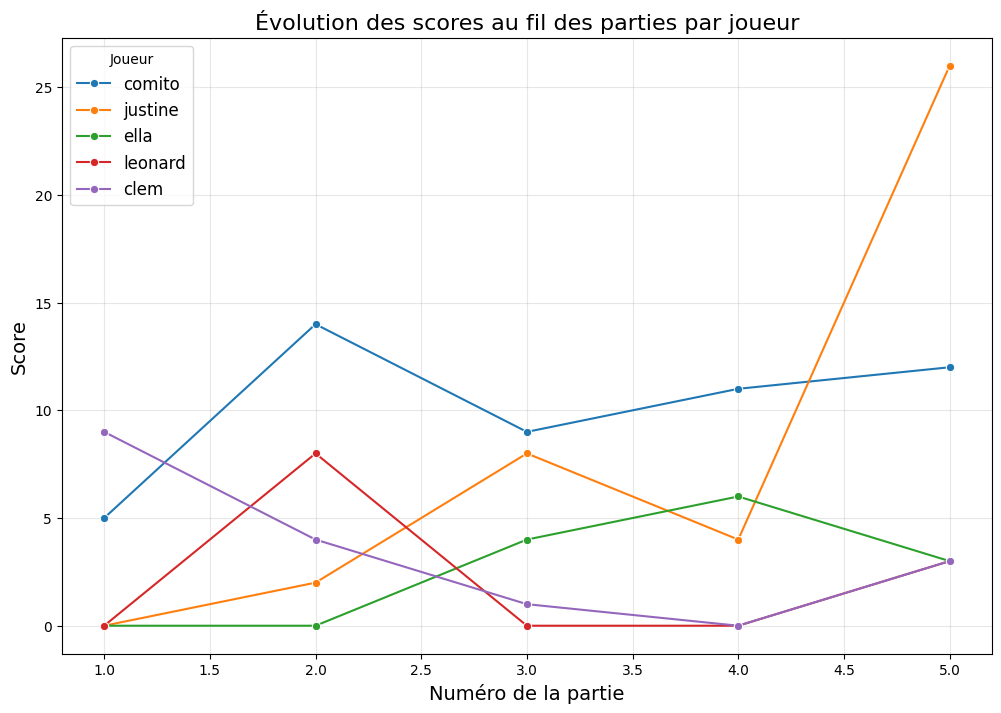

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x="Partie", y="Score", hue="Pseudo", marker="o", palette="tab10")
plt.title("Évolution des scores au fil des parties par joueur", fontsize=16)
plt.xlabel("Numéro de la partie", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(title="Joueur", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

La plupart des joueurs s'améliorent dès la deuxième partie, mais certains ont du mal à progresser les parties suivantes. Cela peut pointer vers des aspects du jeu à ajuster pour améliorer l'expérience.


3) Relation entre durée des parties et score obtenu

Cette visualisation permet de voir si les joueurs qui jouent plus longtemps réussissent à obtenir de meilleurs scores.

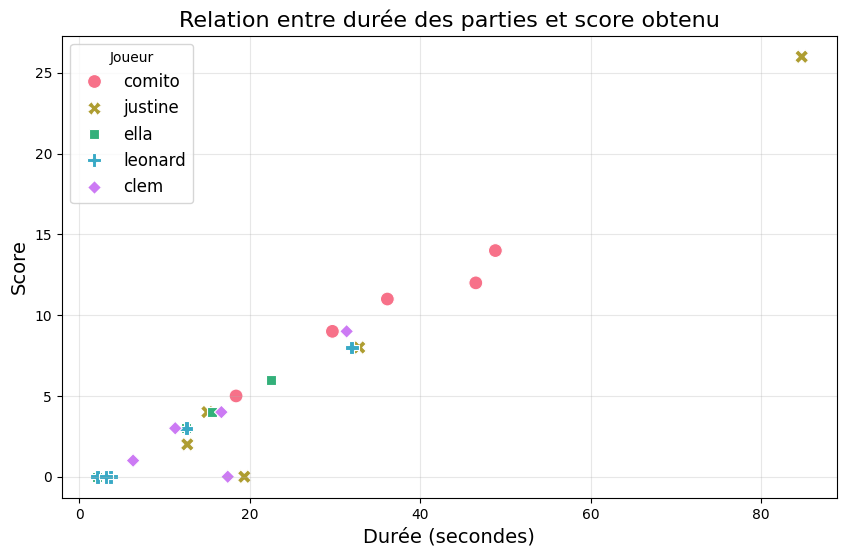

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Durée", y="Score", hue="Pseudo", style="Pseudo", palette="husl", s=100)
plt.title("Relation entre durée des parties et score obtenu", fontsize=16)
plt.xlabel("Durée (secondes)", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(title="Joueur", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

On obtient une courbe linéaire donc, effectivement, les joueurs qui jouent plus longtemps obtiennent de meilleurs scores.